In [1]:
import numpy as np
np.random.seed(2023 - 5 - 28)
import matplotlib.pyplot as plt

# ___Confusion Matrices and Basic Evaluation Metrics___
----------

In [2]:
# Confusion matrix helps measure a model's performance when the R2 score is inadequate, especially with imbalanced datasets.
# Let's visualize the 4 types of classifications.

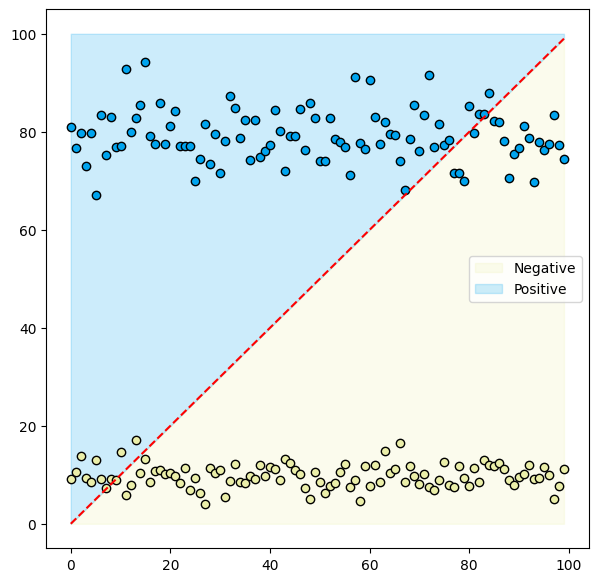

In [3]:
diagonal = np.arange(0, 100, 1)
preds_low = np.random.normal(loc = 10, scale = 2.5, size = diagonal.size)
preds_up = np.random.normal(loc = 80, scale = 5, size = diagonal.size)

fig, axes = plt.subplots()
fig.set_size_inches(7, 7)

axes.plot(diagonal, diagonal, color = "red", linestyle = "--")
axes.fill_between(x = diagonal, y1 = diagonal, y2 = 0, color = "#EBEFA9", label = "Negative", alpha = .2)
axes.fill_between(x = diagonal, y1 = 100, y2 = diagonal, color = "#00A4EF", label = "Positive", alpha = .2)
axes.scatter(diagonal, preds_low, edgecolor = "black", color = "#EBEFA9")
axes.scatter(diagonal, preds_up, edgecolor = "black", color = "#00A4EF")

axes.legend()
plt.show()

In [4]:
# Positive predictions are given in blue colour and negative predictions are given in straw colour.
# False positives -> blue markers in straw background
# False negatives -> straw markers in blue background
# True positives -> blue markers in blue background
# True negatives -> straw markers in straw background

In [5]:
# In our 1,000 predictions;

# 700 are positive predictions.
# 676 true positives
# 24 are false positives
p, tp, fp = 700, 676, 24

# 300 are negative predictions
# 211 true negatives
# 89 false negatives

n, tn, fn = 300, 211, 89

In [6]:
# Accuracy = (true positives + true negatives) / (true positives + true negatives + false positives + false negatives)

accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy

0.887

## ___Other Accuracy Metrics___
-----------

### ___1) Classification error___

In [7]:
# Classification error = (false positives + false negatives) / (true positives + true negatives + false positives + false negatives)

(fp + fn) / (tp + tn + fp + fn)

0.113

In [8]:
# Numericall this is equivalent to 1 - accuracy

1 - accuracy

0.11299999999999999

### ___2) True Positive Rate (TPR) / Sensitivity / Probability of detection___

In [9]:
# True Positive Rate (TPR) = true positives / (true positives + false negatives)
# also called Recall

# This scheme will give higher scores to classifiers that achieve high number of true positives and less false negatives
# less false negatives -> low mispredictions of true positives.

In [10]:
# there are two ways to get a higher TPR value,

# 1) by means of higher true positive predictions
# 2) by means of lower false negative predictions

In [11]:
tp / (tp + fn)

0.8836601307189542

### ___3) Precision___

In [12]:
# What roportion of the positive predictions are in-fact positive?

# Precision = true positives / (true positives + false positives)

tp / (tp + fp)

0.9657142857142857

In [13]:
# How to decide which metric to apply when?
# The key question here is which is more important to avoid? false positives or false negatives?

# Precision -> minimize false positives
# Recall or TPR -> minimize false negatives.

In [14]:
# In certain cases Precision is the best choice.
# When a lawsuit needs to arrest a criminal and an ML model is used to identify all possible criminal,
# falsely arresting an innocent individual can be more damaging (false positive) than letting the real perpetrator run free while we gather concrete 
# evidence.

# In other cases, Recall may be the best measure.
# Consider a medical facility using ML models to identify brain scans with potential tumors.
# We cannot afford to have false negatives, since that would mean a patient with potential brain tumour not receiving proper treatment.
# Even if this happens at the expense of more false positives, that's fine since we could use human experts to sift them out.

### ___3) False Positive Rate (FPR)___

In [15]:
# This gives the fraction of all negative instances that the classifier incorrectly identifies as positive.
# FPR = false positives / (true negatives + false positives)

In [16]:
# A statistic called Specificity is given as 1 - FPR

In [17]:
reds = np.append(np.random.randint(50, 100, size = 60), np.random.randint(10, 30, size = 6))
blacks = np.append(np.random.randint(0, 50, size = 60), np.random.randint(50, 70, size = 5))

np.random.shuffle(reds)
np.random.shuffle(blacks)

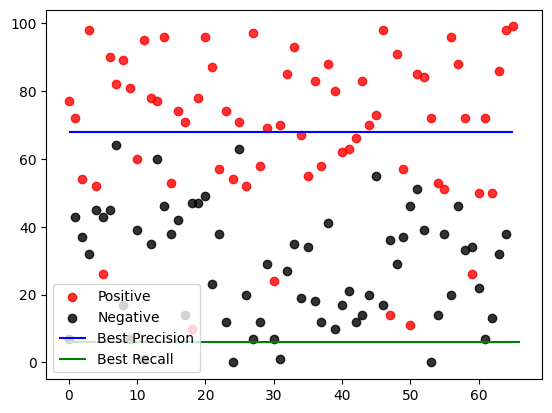

In [18]:
plt.scatter(range(reds.size), reds, color = "red", alpha = 0.8, label = "Positive")
plt.scatter(range(blacks.size), blacks, color = "black", alpha = 0.8, label = "Negative")
plt.hlines(y = blacks.max() + 4, xmin = 0, xmax = blacks.size, label = "Best Precision", color = "blue")
plt.hlines(y = reds.min() - 4, xmin = 0, xmax = reds.size, label = "Best Recall", color = "green")
plt.legend()
plt.show()

In [19]:
# The red line accurately separates all black points at the expense of some contaminant red points.
# The green line accurately separates all red points, at the expesne of many contaminant black points.

In [20]:
# Precision and Recall are negatively correlated.
# When precision increases recall declines.

In [21]:
# There's a tradeoff between precision & recall.

# Recall oriented ML tasks => medical and legal applications.
# and is often paired with a human expert to filter out failures.

# Precision oriented ML tasks => search engine ranking, query suggestions, document classification, customer facing tasks.

### ___4) F1 Score___
-------------

In [5]:
# F1 score = 2 x Precision x Recall / (Precision + Recall)
# = 2 x TP / (2 x TP x FN x FP)